# Abstract
##### Objective:  To predict the number of possible wins in a Baseball Match

#### Description of the Dataset

##### Input features: 
 - Runs,
 - At Bats,
 - Hits, 
 - Doubles, 
 - Triples, 
 - Homeruns, 
 - Walks, 
 - Strikeouts, 
 - Stolen Bases, 
 - Runs Allowed, 
 - Earned Runs, 
 - Earned Run Average (ERA), 
 - Shutouts, Saves, 
 - Errors.

###### Output:
- Number of predicted wins (W)

# Importing libraries and Dataset

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import warning 
import warnings
warnings.filterwarnings("ignore")


In [2]:
#read csv file
baseball = pd.read_csv("Baseball.csv")

In [3]:
#inspect the first 5 records of the file
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#check the shape of the dataframe
baseball.shape

(30, 17)

 #### The DataFrame has 30 records and 17 columns

# Indetifying the type of problems 

In [5]:
#basic information of the datacolumn
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


- There are no null values in the columns and all the columns are of numeric type

In [6]:
#view name of the columns
baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
#inspect the data type of the columns
baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
#inspect the unique values of the columns
base = ['W','R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for val in base:
    print(baseball[val].unique())

[ 95  83  81  76  74  93  87  80  78  88  86  85  68 100  98  97  64  90
  71  67  63  92  84  79]
[724 696 669 622 689 891 764 713 644 748 751 729 661 656 694 647 697 655
 640 683 703 613 573 626 667 720 650 737]
[5575 5467 5439 5533 5605 5509 5567 5485 5640 5511 5459 5417 5544 5600
 5484 5631 5491 5480 5571 5527 5428 5463 5420 5529 5385 5565 5649 5457
 5572]
[1497 1349 1395 1381 1515 1480 1397 1370 1383 1495 1419 1363 1331 1379
 1405 1386 1462 1341 1378 1382 1351 1420 1361 1374 1346 1486 1494 1324
 1479]
[300 277 303 260 289 308 272 246 278 294 279 243 262 288 292 274 257 295
 265 236 251 263]
[42 44 29 27 49 17 19 20 32 33 26 21 22 46 39 30 34 13 40 18 37 48 36]
[139 156 141 136 151 232 212 217 167 161 172 230 176 198 146 137 140 171
 145 177 120 100 130 187 154 148 186]
[383 439 533 404 455 570 554 418 436 478 503 486 435 475 506 461 567 412
 496 488 539 375 471 387 563 457 490 426 388]
[ 973 1264 1157 1231 1259 1151 1227 1331 1310 1148 1233 1392 1150 1336
 1119 1267 1322 1518 1299

- All the values seems to be numerical and with both discrete and continuous values

##### Supervised / Regression


# Exploratory Data Analysis and Data Cleaning

Text(0.5, 1.0, 'Predicted wins')

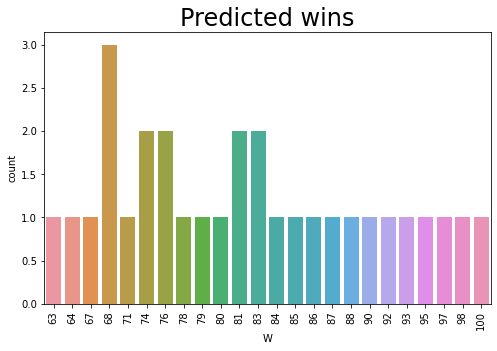

In [9]:
#count plot to identify wins
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="W")
plt.xticks(rotation=90)
plt.title("Predicted wins", fontsize = 24)

### Observations:
- The winning numbers 68 has the highest count.
- The winning numbers 74, 76, 81, and 83 has the second highest count of wins
- The other winning numbers are nuteral with a count of 1

Text(0.5, 1.0, 'Runs')

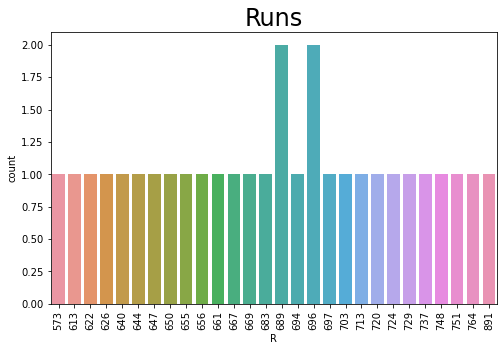

In [10]:
#count plot to identify runs
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="R")
plt.xticks(rotation=90)
plt.title("Runs", fontsize = 24)

### Observation:
- The run rate of 689 and 696 are having highest run count

Text(0.5, 1.0, 'At Bats')

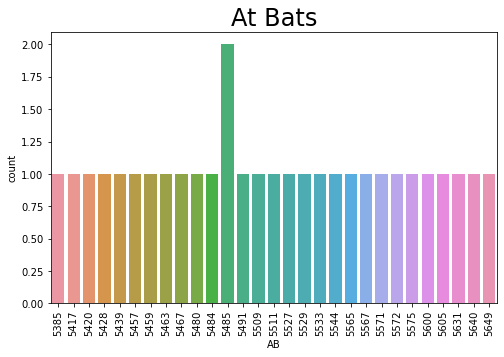

In [11]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="AB")
plt.xticks(rotation=90)
plt.title("At Bats", fontsize = 24)

### Observation:
- The highest count for  turn at batting is 5485

Text(0.5, 1.0, 'Hits')

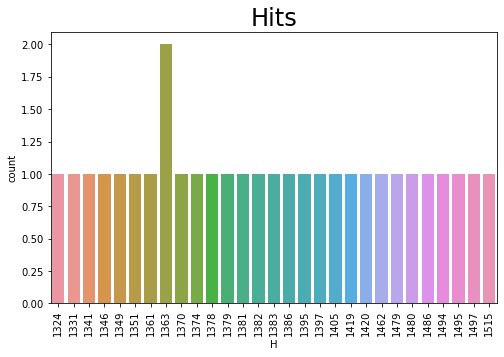

In [12]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="H")
plt.xticks(rotation=90)
plt.title("Hits", fontsize = 24)

### observation
- The higher count of hits is 1363

Text(0.5, 1.0, 'Doubles')

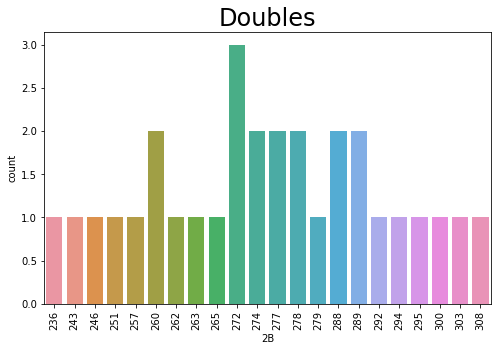

In [13]:
#count plot for doubles
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="2B")
plt.xticks(rotation=90)
plt.title("Doubles", fontsize = 24)

### Observation:
- 260, 272, 274, 277,278,288,289 highest count of doubles score

Text(0.5, 1.0, 'Triples')

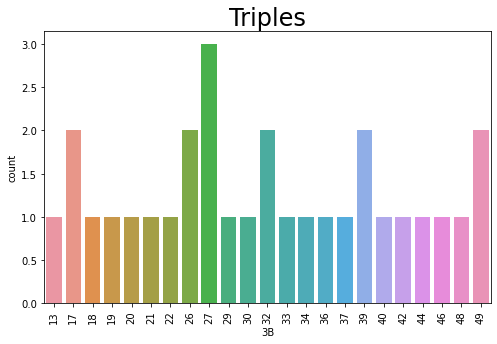

In [14]:
#count plot for Triples
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="3B")
plt.xticks(rotation=90)
plt.title("Triples", fontsize = 24)

### Observations:
- 17,26,27,32,39,49 have the highest  count of Triples score, 27 being the most highest.

Text(0.5, 1.0, 'HomeRuns')

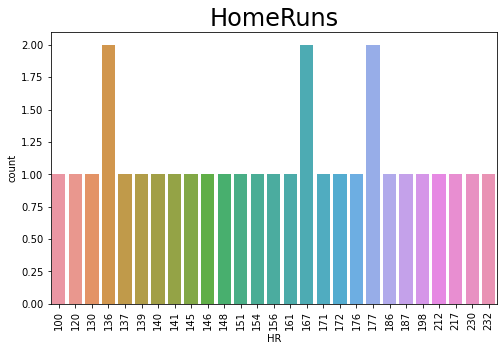

In [15]:
#count plot
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="HR")
plt.xticks(rotation=90)
plt.title("HomeRuns", fontsize = 24)

### Observations:
- 136, 167, 177 has the highest count of home run score

#### Important variable for predicting the winning score

Text(0.5, 1.0, 'base on balls')

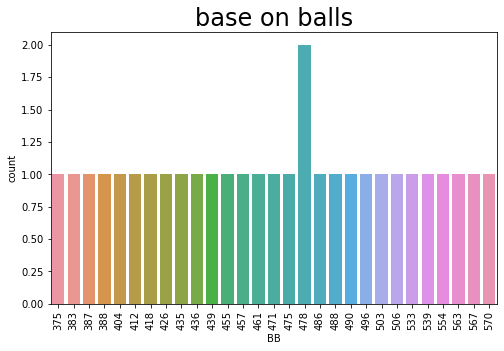

In [16]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="BB")
plt.xticks(rotation=90)
plt.title("base on balls", fontsize = 24)

### Observations:
- 478 score is the highest count of base on balls

Text(0.5, 1.0, 'Stolen Bases')

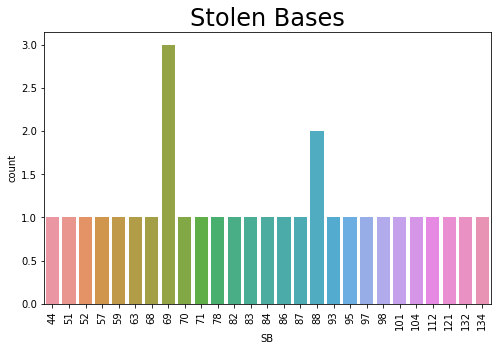

In [17]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="SB")
plt.xticks(rotation=90)
plt.title("Stolen Bases", fontsize = 24)

### Observations:
- The Highest score count for stolen base is 68 and 88 

Text(0.5, 1.0, 'Strikeouts')

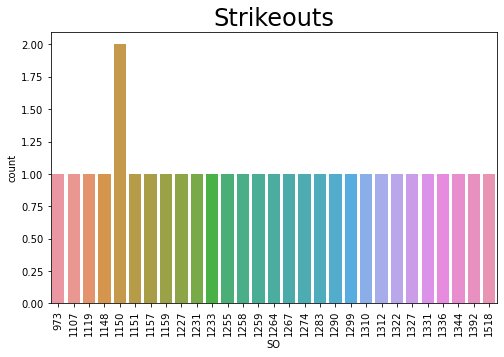

In [18]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="SO")
plt.xticks(rotation=90)
plt.title("Strikeouts", fontsize = 24)

### Observation:
- The highest score count for strikeout is 1150

Text(0.5, 1.0, 'Runs Allowed')

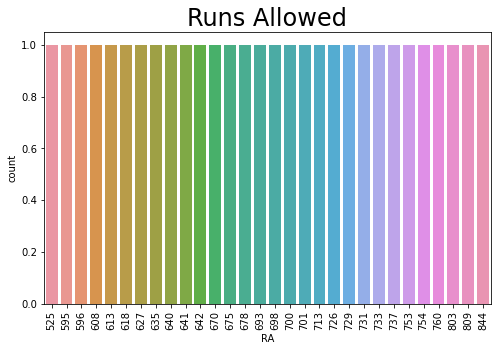

In [19]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="RA")
plt.xticks(rotation=90)
plt.title("Runs Allowed", fontsize = 24)

- Neutral

Text(0.5, 1.0, 'Earned Runs')

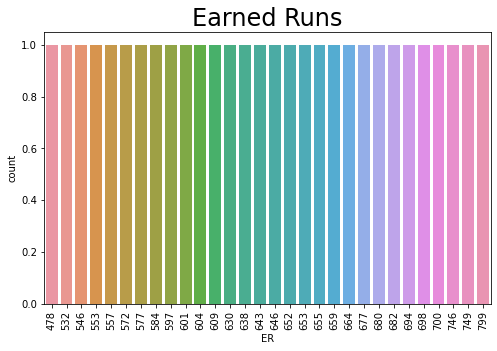

In [20]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="ER")
plt.xticks(rotation=90)
plt.title("Earned Runs", fontsize = 24)

- Neutral

Text(0.5, 1.0, 'Earned Run Average (ERA)')

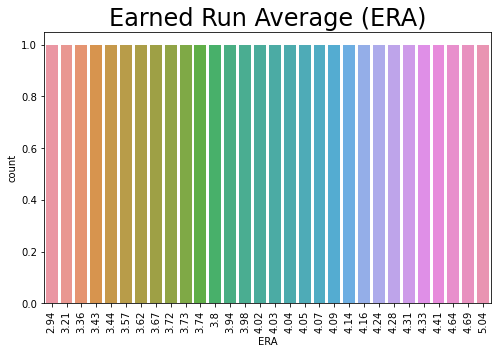

In [21]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="ERA")
plt.xticks(rotation=90)
plt.title("Earned Run Average (ERA)", fontsize = 24)

- Neutral

Text(0.5, 1.0, 'Earned Run Average (ERA)')

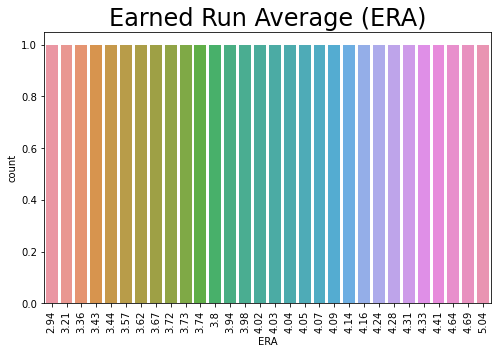

In [22]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="ERA")
plt.xticks(rotation=90)
plt.title("Earned Run Average (ERA)", fontsize = 24)

- Neutral

Text(0.5, 1.0, 'complete game')

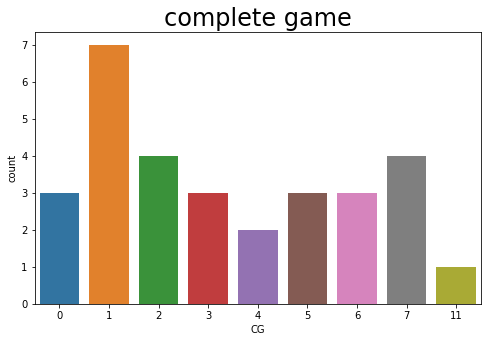

In [23]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="CG")
#plt.xticks(rotation=90)
plt.title("complete game", fontsize = 24)

### observation:
- One complete game has the highest count of all.
- Eleven complete games has the lowest count of all.

##### The highest count of complete games the highest probability to win

Text(0.5, 1.0, 'Shutouts')

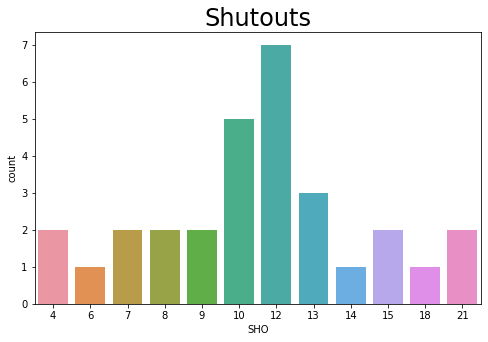

In [24]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="SHO")
#plt.xticks(rotation=90)
plt.title("Shutouts", fontsize = 24)

### Observations:

-  The highest number of shoutouts is 12

#### The higher the number of shoutouts, the higher the possibility to win

Text(0.5, 1.0, 'Saves')

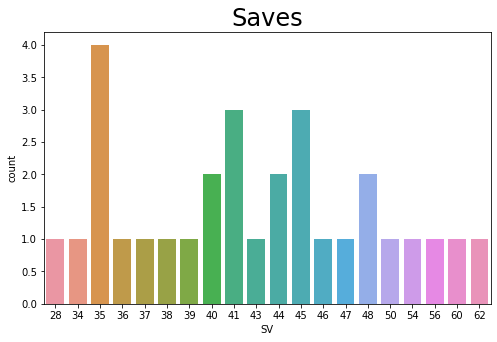

In [25]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="SV")
#plt.xticks(rotation=90)
plt.title("Saves", fontsize = 24)

### Observations:

 - The highest count of saves is 35,
 - The second highest count of saves are 41, 45
 - The third highest count of saves are 40, 44, and 48
    
##### The winning is decided based on the number of saves

Text(0.5, 1.0, 'Errors')

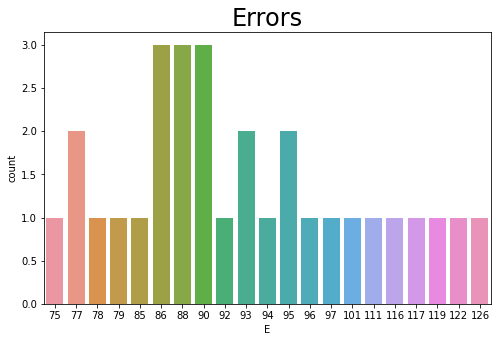

In [26]:
#count plot 
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=baseball, x="E")
#plt.xticks(rotation=90)
plt.title("Errors", fontsize = 24)

### Observation:

-  86,88,90 are the highest count of error

##### errors affect the chance of win

### Bivariate analysis

In [27]:
#check the columns
baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

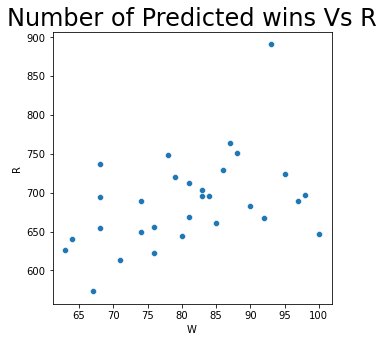

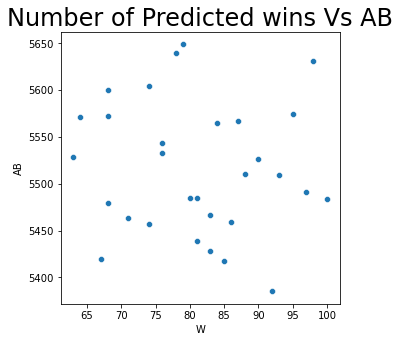

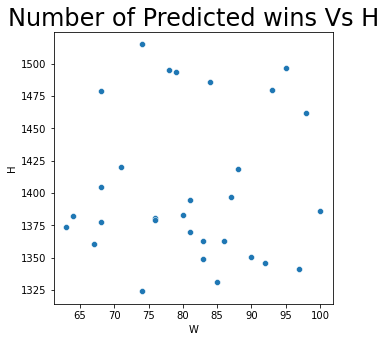

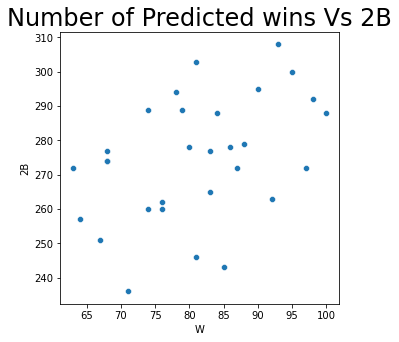

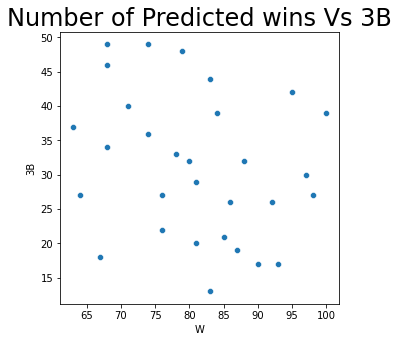

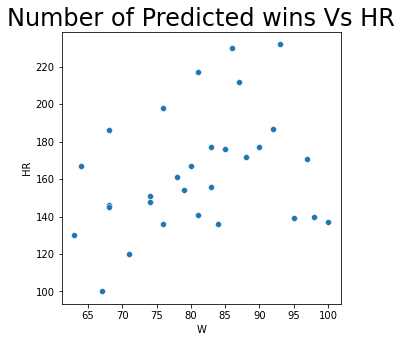

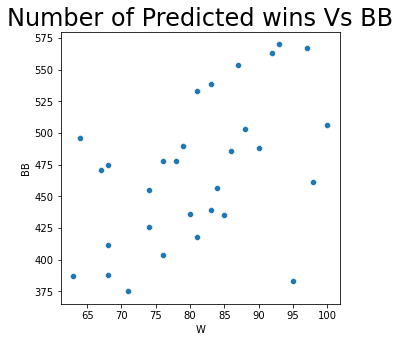

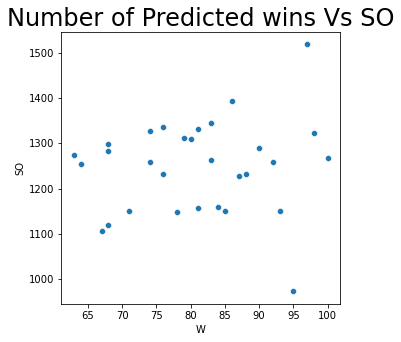

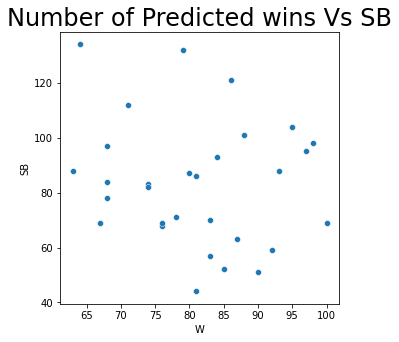

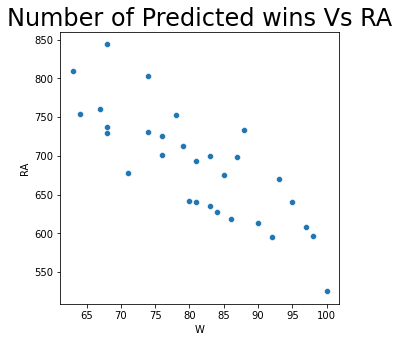

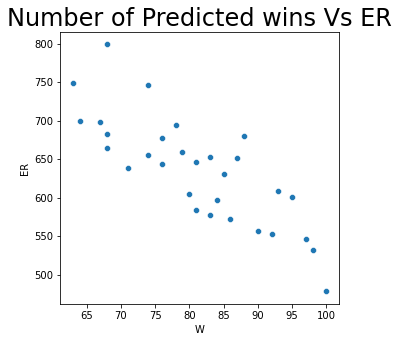

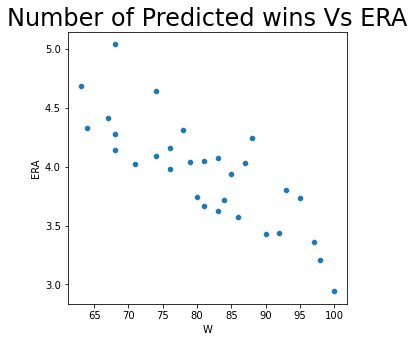

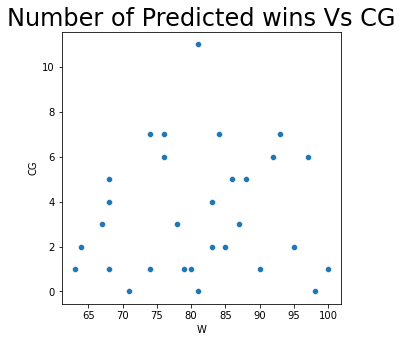

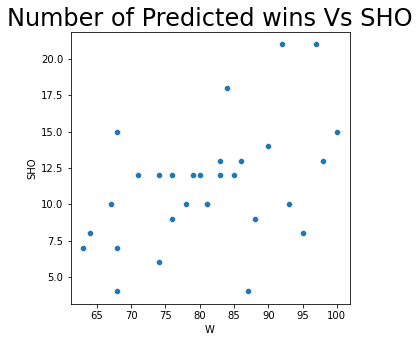

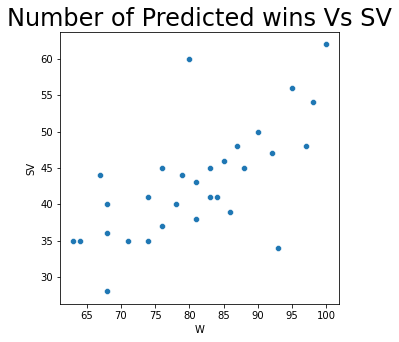

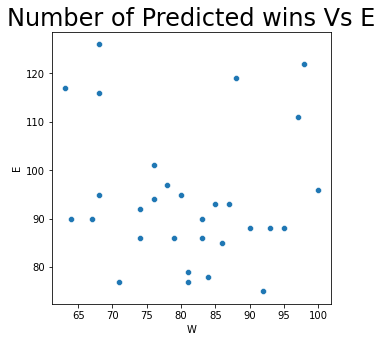

In [28]:
# Scatter plot to check the relationshipof win with other columns
base = [ 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for val in base:
    fig_size = (5,5)
    fig, ax = plt.subplots(figsize = fig_size)
    plt.title("Number of Predicted wins" + " Vs " +val, fontsize=24)
    sns.scatterplot(x="W", y=val, data=baseball)

### Observation:

##### Wins Vs Runs:

- Increased number of runs , increased number of wins
- Positive Linear relationship

###### Win Vs At Bats

- The more the score for at bats the more the chance for a win

###### Wins Vs Hits

- The higher the hit count the higher the win count, but the value are scattered and shows week liner relationship

###### Win vs (Doubles, Triples)

- Doubles positive linear relationship
- Triples Negative linear relationship

###### Wins vs Homerun:

- Positive linear relationship

###### Base on Ball:

- Positive linear relationship

###### Strike Out

- Positive linear relationship

###### Stolen Base

- Positive linear relationship

###### Runs Allowed, Average Runs, Earned Average Runs:
 
-  Negative linear relationship

###### Shoutouts, complete games , errors and saves:

- Saves positive linear relationship
- Shoutouts positive linear relationship

- ERRORS are more spreaded

#### Descriptive Statistics

###### Summary Statitics

In [29]:
#describe the initial stats
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


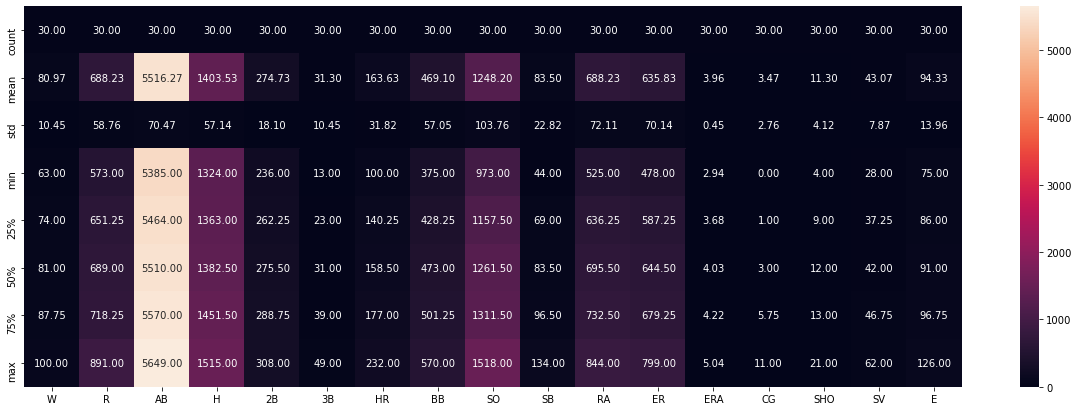

In [30]:
plt.figure(figsize =(21, 7))
sns.heatmap(baseball.describe(), annot=True, linecolor = "black", fmt="0.2f")

### Observation:

- There are 30 records
##### Mean and Standard deviation:
- Skewed data
- Wins : high difference between mean and std
- Runs : high difference between mean and std
- At Bats, Hits, Doubles, Triples, Home run, bats at ball, shoutouts and the rest  : high difference between meand and std
    
#### Min and Max:

- should we scale the data  ?
 - Run , Triples, Home run and other columns have a big difference in min - max range

## Multivariate

### Pairplot

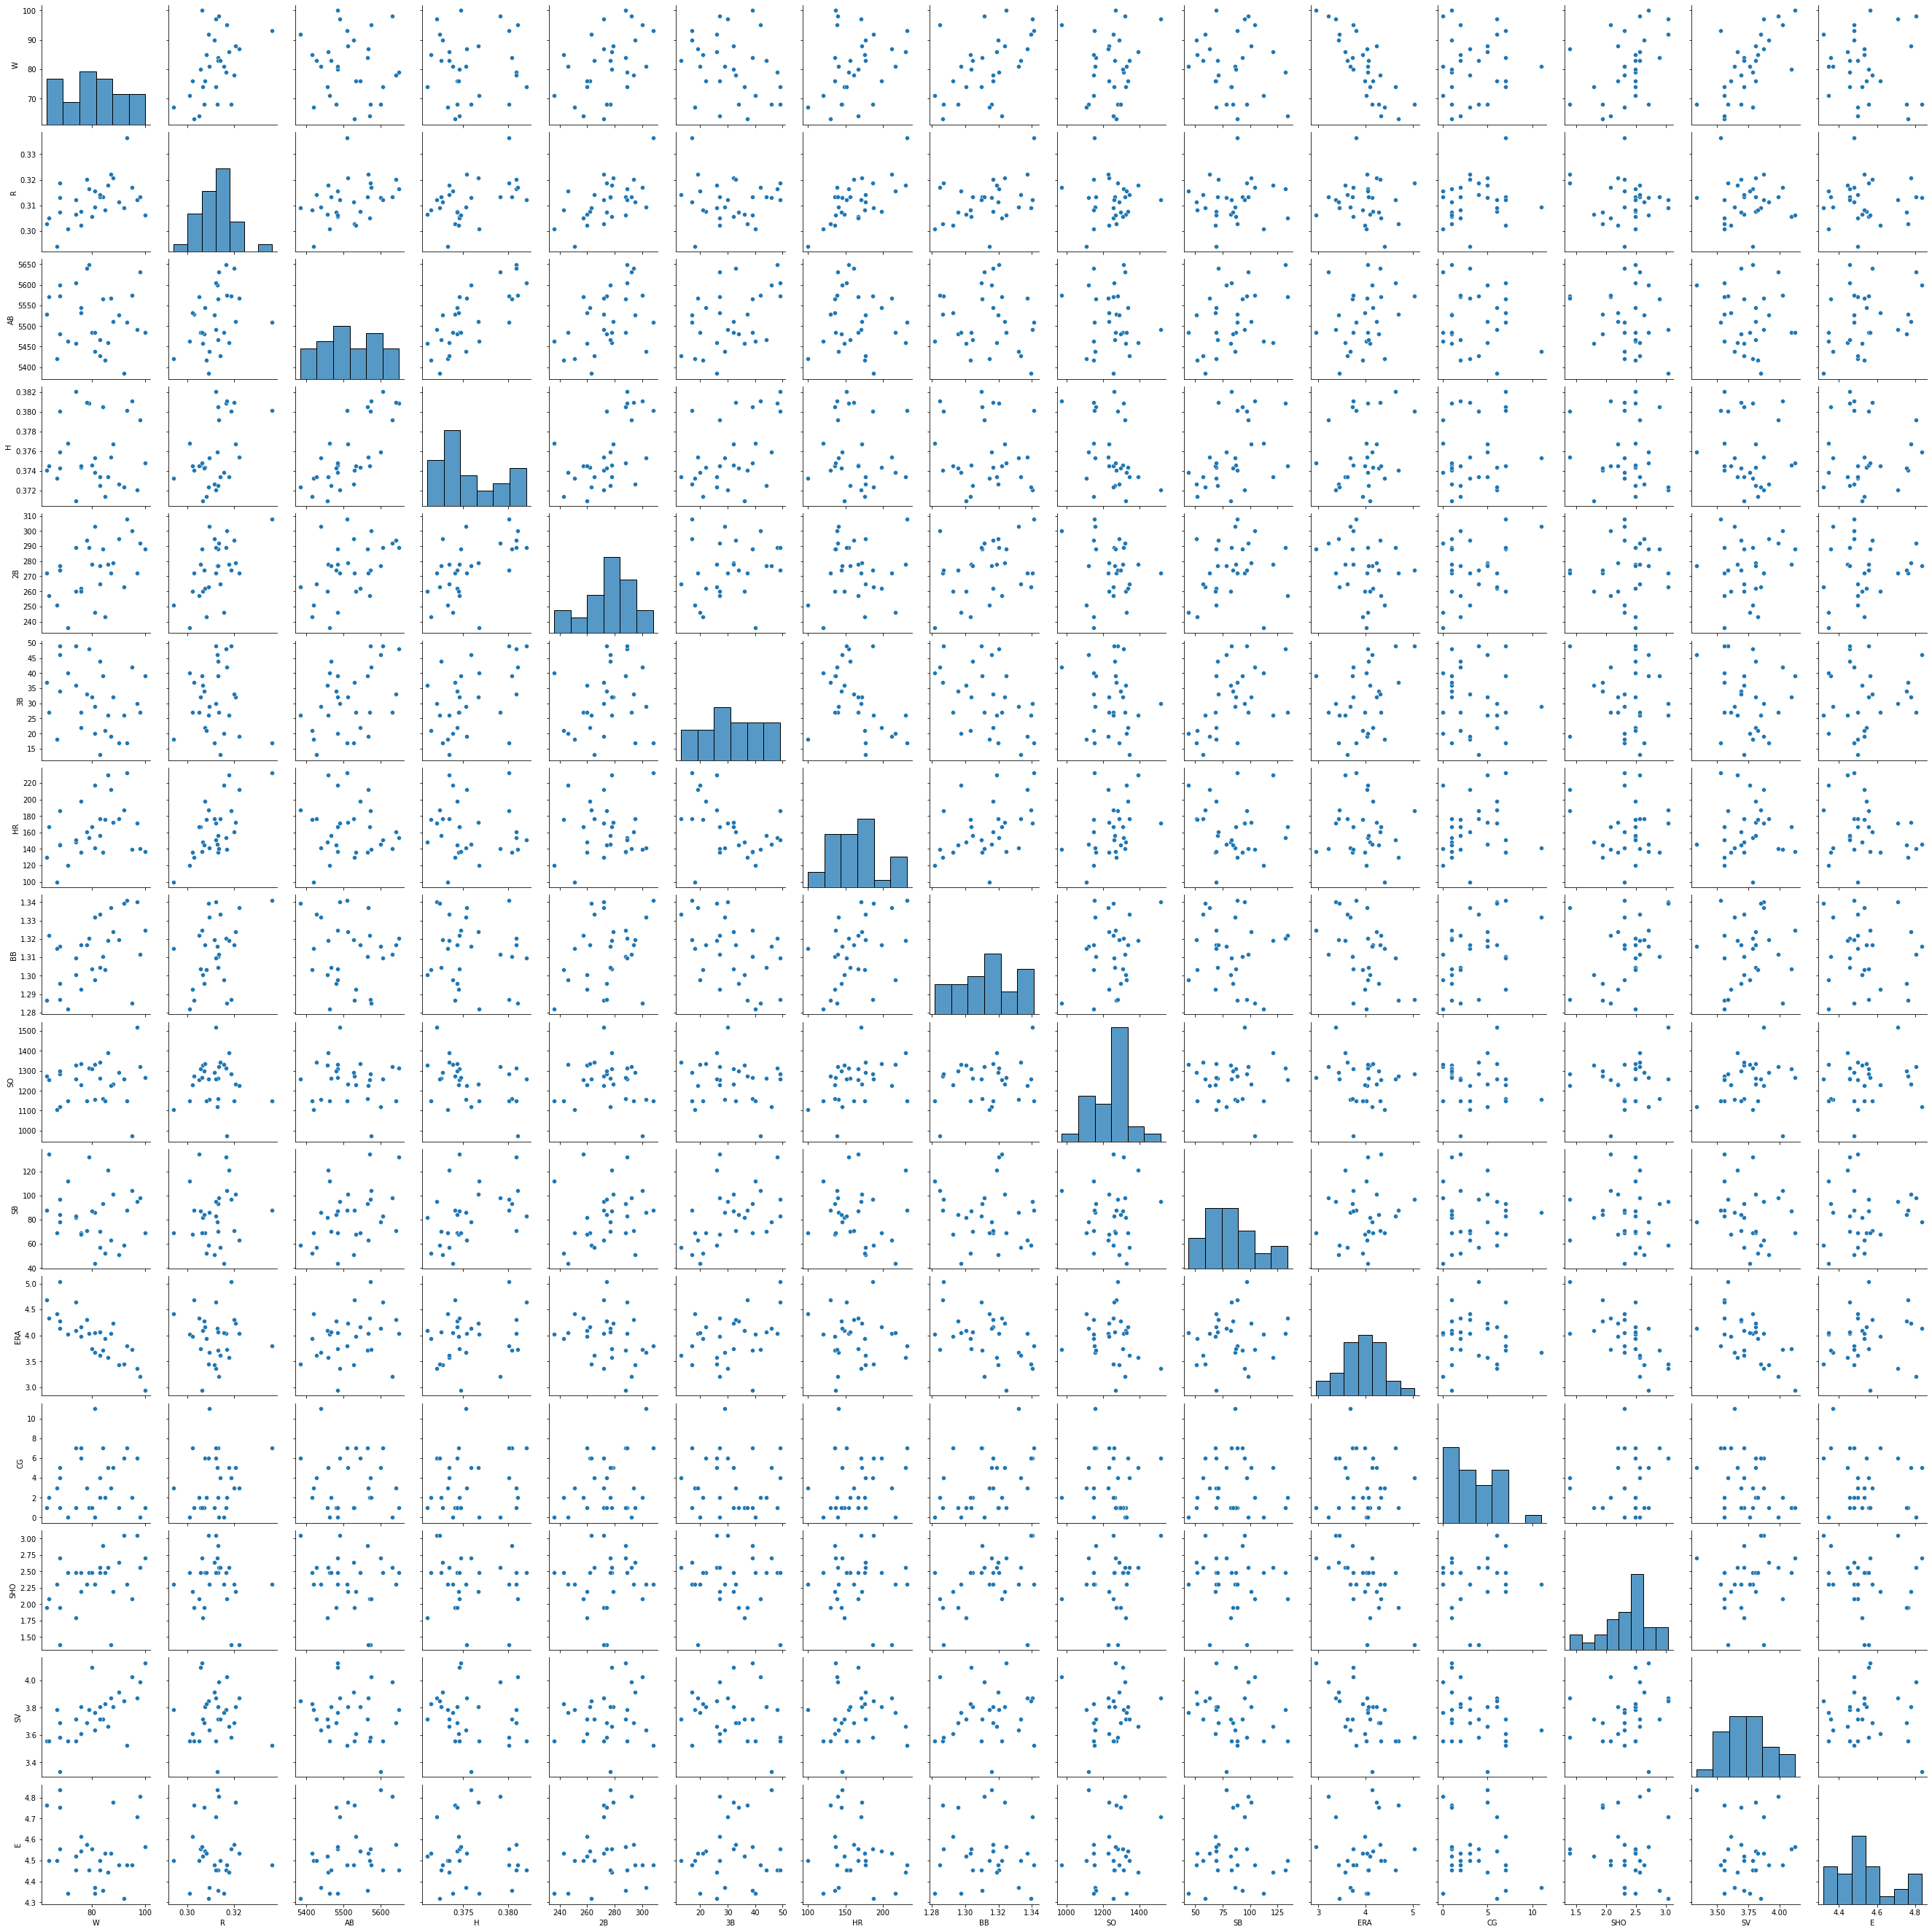

In [90]:
sns.pairplot(baseball)

### Correlation

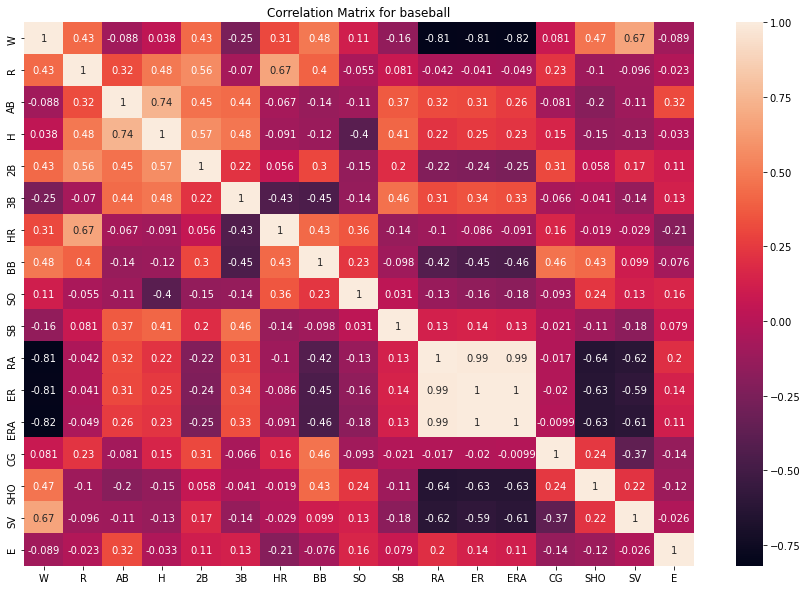

In [32]:
base_correlation = baseball.corr()
plt.figure(figsize = [15,10])
sns.heatmap(base_correlation, annot = True)
plt.title("Correlation Matrix for baseball")
plt.show()

### Observation:

- At ball, triples, stolen base, Runs Allowe, Average runs, earned average runs, and error are negatively correlated with wins
- Runs allowed, Average runs, and Earned Average runs  might be under multicollineraity, further investigation done to identify the multicollinearity

### Identify Multicollineariy

In [33]:
# import libraries
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
#function to find multicollinearity
def find_multicollinearity(data):
    variance = pd.DataFrame()
    data = sma.add_constant(data)
    variance["COLUMN NAME"] = data.columns
    variance["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(variance)


In [35]:
find_multicollinearity(baseball)

,COLUMN NAME,VIF
0,const,63213.349939
1,W,19.891017
2,R,23.249385
3,AB,13.665681
4,H,10.070734
5,2B,4.883096
6,3B,3.304753
7,HR,10.967594
8,BB,4.269219
9,SO,2.661169


 -  Considering the Multicollinearity issue we can drop RA,ER AND ERA.
 -  Threshold VIF < 20

In [36]:
baseball = baseball.drop("RA", axis=1)
baseball = baseball.drop("ER", axis=1)
#baseball = baseball.drop("ERA", axis=1)

- Dropped 2 columns with multicollinearity 

In [37]:
baseball.shape

(30, 15)

In [38]:
baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.126063,-0.020783,-0.106563,-0.183418,0.079149


# Data Cleaning

## Checking Null Values

In [39]:
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

- No null values

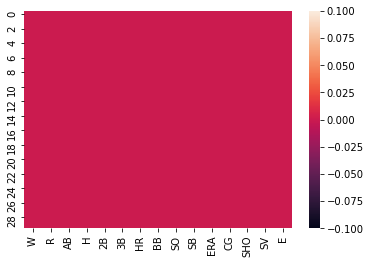

In [40]:
sns.heatmap(baseball.isnull())

- No null values

## Chceking for skewness and removal

In [41]:
baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [42]:
baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG',
       'SHO', 'SV', 'E'],
      dtype='object')

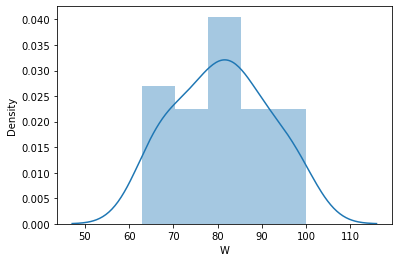

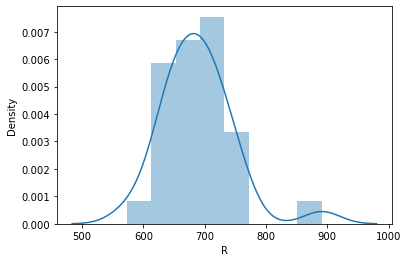

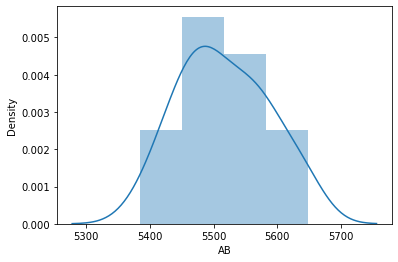

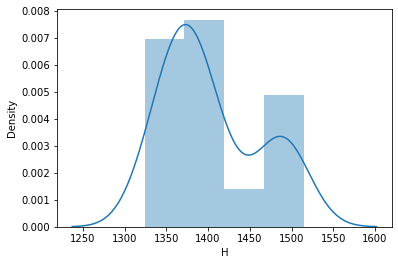

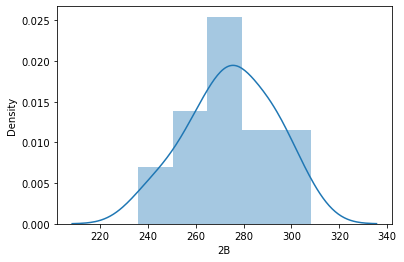

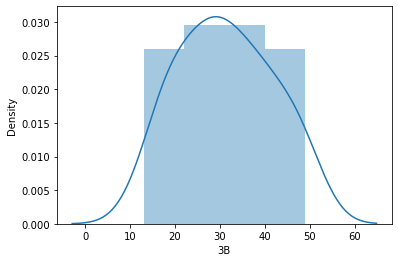

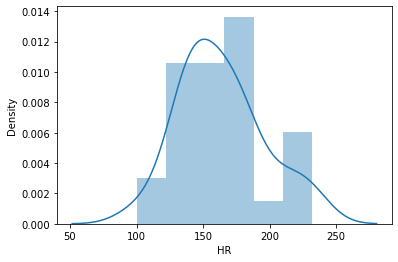

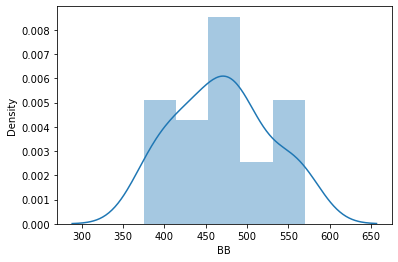

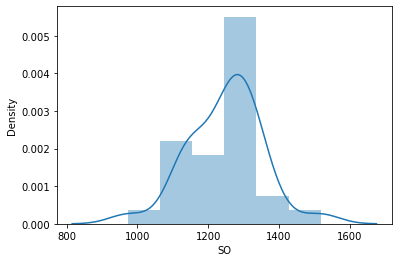

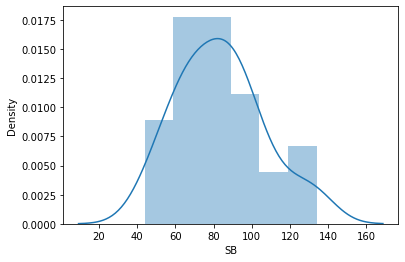

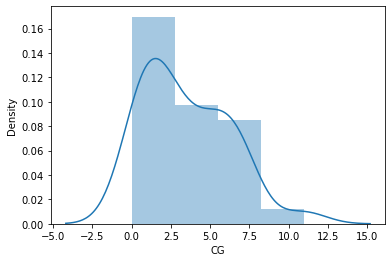

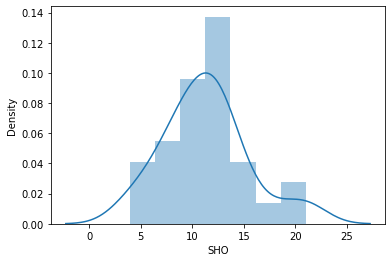

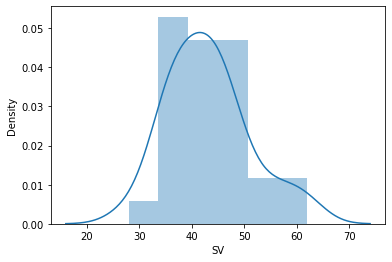

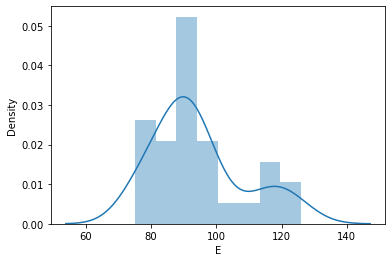

In [43]:
base = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO',
       'SV', 'E']
for value in base:
    sns.distplot(baseball[value],kde=True)
    plt.show()

  - skewness present in few columns.Ignore the skewness since it might not affect the prediction.
 
 -  R, H,BB, 'CG', 'SHO',
       'SV', 'E' are positively skewed(right skewed)

In [47]:
from scipy.stats import boxcox
skeww = ['R', 'H','BB', 'CG', 'SHO', 'SV', 'E']

baseball['R'] = boxcox(baseball['R'],0)
baseball['H'] = boxcox(baseball['H'],0)
baseball['BB'] = boxcox(baseball['BB'],0)

In [52]:
#baseball['CG'] = boxcox(baseball['CG'],0)
baseball['SHO'] = boxcox(baseball['SHO'],0)
baseball['SV'] = boxcox(baseball['SV'],0)

In [53]:
baseball['E'] = boxcox(baseball['E'],0)

In [54]:
baseball.skew()

W      0.047089
R      0.636077
AB     0.183437
H      0.619394
2B    -0.230650
3B     0.129502
HR     0.516441
BB    -0.086492
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO   -0.721953
SV     0.150582
E      0.630080
dtype: float64

- skewness removed

# Checking for outlier and removal

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

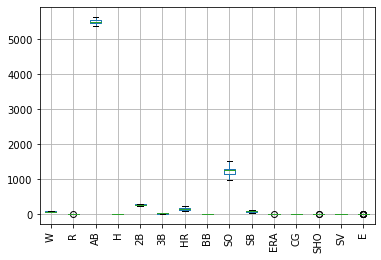

In [56]:
baseball.boxplot()
plt.xticks(rotation=90)




- Very few outliers which wont affect the prediction

In [57]:
#shuffle the dataset to avoid biased score prediction 
baseball = baseball.sample(frac=1, random_state = 0)

# Splitting the dependent and independent variables

In [58]:
x = baseball.drop("W", axis =1)
y = baseball["W"]

In [59]:
print(x.shape, y.shape)

(30, 14) (30,)


In [60]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

new = scale.fit(x)
new_model = new.transform(x)

#scaled 
x = new_model

# Finding Best Random State

In [61]:
## finding the best random state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.9695404634763797  on Random State  645


# TEST/TRAIN split

In [62]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 645)

In [63]:
# printing the shape of train test split data
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(6, 14)
(6,)
(24, 14)
(24,)


# Finding the best algorithm

In [64]:
# Linear regression to test the best score
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test, predlr))
print("Mean absolute error: ", mean_absolute_error(y_test,predlr))
print("Mean squared error: ", mean_squared_error(y_test,predlr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predlr)))



0.9695404634763797
Mean absolute error:  1.8934253264228975
Mean squared error:  5.337187677527692
Root Mean Squared Error:  2.310235416040472


In [65]:
#RandomforestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(x_train,y_train)
predrfr = RFR.predict(x_test)
print(r2_score(y_test,predrfr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predrfr))
print("Mean squared error: ", mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predrfr)))

0.588451838934686
error
Mean absolute error:  7.121666666666667
Mean squared error:  72.11238333333336
Root Mean Squared Error:  8.491901043543391


In [66]:
#Adaboost regresor
from sklearn.ensemble import AdaBoostRegressor
abr = RandomForestRegressor(n_estimators=100)
abr.fit(x_train,y_train)
predabr = abr.predict(x_test)
print(r2_score(y_test,predrfr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predabr))
print("Mean squared error: ", mean_squared_error(y_test,predabr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predabr)))

0.588451838934686
error
Mean absolute error:  7.519999999999996
Mean squared error:  77.31709999999994
Root Mean Squared Error:  8.793014272705348


In [67]:
from sklearn.model_selection import cross_val_score

lr_scr = cross_val_score(LR, x, y, cv = 5)
print("the cross validation score of Linear regression model :", lr_scr.mean())

the cross validation score of Linear regression model : 0.47605755573229835


In [69]:
from sklearn.model_selection import cross_val_score

rf_scr = cross_val_score(RFR, x, y, cv = 5)
print("the cross validation score of Random Forest regression model :", rf_scr.mean())

the cross validation score of Random Forest regression model : 0.38871570909583475


In [70]:
from sklearn.model_selection import cross_val_score

ab_scr = cross_val_score(abr, x, y, cv = 5)
print("the cross validation score of AdaBoost regressoin model :", ab_scr.mean())

the cross validation score of AdaBoost regressoin model : 0.32831850793361195


In [71]:
diff = round((r2_score(y_test, predlr))*100) - round((lr_scr.mean())*100)
print("The difference is : " , diff )

The difference is :  49.0


In [72]:
diff = round((r2_score(y_test, predrfr))*100) - round((rf_scr.mean())*100)
print("The difference is : " , diff )

The difference is :  20.0


In [73]:
diff = round((r2_score(y_test, predabr))*100) - round((ab_scr.mean())*100)
print("The difference is : " , diff )

The difference is :  23.0


#### Observation:

- The cross validation score is very poor and difference between accuracy score and cross validation score is very high.
- Regularization technique can be used to reduce the erros. The function will fit the training and testing set appropriately. hence avoiding overfitting or other errors

# Regularization

L2 - regularization

In [74]:
# Ridge
from sklearn.linear_model import Ridge

In [75]:
rr = Ridge(alpha = 0.01)
rr.fit(x_train, y_train)
#low alpha > more generalization

Ridge(alpha=0.01)

In [76]:
Ridge_train_score = rr.score(x_train,y_train)
print(Ridge_train_score)
Ridge_test_score = rr.score(x_test,y_test)
print(Ridge_test_score) 

0.9318631174955853
0.971043009294786


# Hyper Parameter tuning - Using Ridge CV(L2-regularization)

In [77]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])

In [78]:
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]))

In [79]:
ridge_cv.alpha_

0.1

In [80]:
ridgepred = ridge_cv.predict(x_test)

In [81]:
ridge_cv.score(x_train,y_train)

0.9080137456587524

In [82]:
ridge_cv.score(x_test,y_test)

0.916362574797633

In [83]:
ridgepred

array([75.31815353, 97.27195388, 87.67515188, 82.67679339, 69.18993966,
       65.0052433 ])

# Saving the model

In [84]:
import joblib
joblib.dump(ridge_cv,"ridge_base.obj")

['ridge_base.obj']

In [85]:
joblib.dump(ridge_cv,"ridge_base.pkl")

['ridge_base.pkl']

# Conclusion

In [88]:
import numpy as np
a = np.array(y_test)
predicted = np.array(ridgepred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,68,75.318154
1,100,97.271954
2,86,87.675152
3,87,82.676793
4,68,69.189940
5,63,65.005243


# Visuvalizing prediction

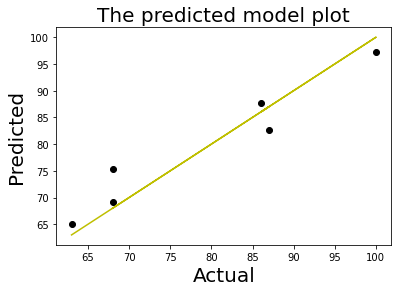

In [89]:
plt.scatter(x=y_test, y=ridgepred, color = "black")
plt.plot(y_test,y_test, color='y')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model plot", fontsize=20)
plt.show()